<a href="https://colab.research.google.com/github/Vey27/Deep-Learning-and-Computer-Vision/blob/main/Weight_Regularization_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'make_moons' is a built-in dataset in scikit-learn that generates two interleaving half circles. It is a binary classification problem, where the goal is to predict which half circle a point belongs to.

Weight regularization is a technique used to prevent overfitting in neural networks. In this case study, we will use L2 regularization, also known as weight decay, which adds a penalty term to the loss function proportional to the squared magnitude of the weights. This encourages the network to learn smaller weights and reduces the complexity of the model.

This code generates a 2D dataset using the make_moons() function from the sklearn.datasets module in Python. Specifically, it creates 100 samples in the shape of two interleaving half circles using a specified amount of noise and a random state seed of 1.

The resulting dataset is stored in X, which contains the features of each sample, and y, which contains the corresponding class labels (0 or 1). The for loop is used to plot each class separately using pyplot.scatter(). Finally, the pyplot.show() function is called to display the resulting plot.

However, this code does not include any weight regularization techniques. Weight regularization is a common technique used in machine learning to prevent overfitting of the model. In general, it adds a penalty term to the loss function that encourages the model to have smaller weights. Two popular weight regularization techniques are L1 regularization and L2 regularization.

To add L2 weight regularization to this code, you can use a regularized version of a neural network model, such as the Sequential() model from the keras.models module. Here's an example of how to modify the code:


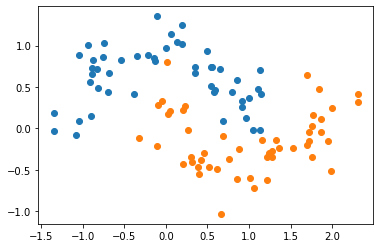

In [1]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from numpy import where

X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

for class_value in range(2):
	row_ix = where(y == class_value)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()

This code uses the make_moons dataset from scikit-learn to create a binary classification problem with two input features and a non-linear decision boundary. The model architecture consists of one hidden layer with 500 units and a ReLU activation function and an output layer with one unit and a sigmoid activation function. The optimizer used is Adam, and the loss function used is binary cross-entropy.

To address potential overfitting, weight regularization is applied to the hidden layer using the default L2 regularization parameter in Keras. The code uses the fit() function to train the model on the training data for 4000 epochs with a batch size of the default value, which is 32.

After training, the code evaluates the model's performance on both the training and test data using the evaluate() function and prints the resulting accuracy scores. Finally, the code plots the training and validation loss and accuracy curves using matplotlib.

Overall, this code demonstrates how to use weight regularization to prevent overfitting in a simple neural network for binary classification on a non-linear dataset.

Train: 1.000, Test: 0.914


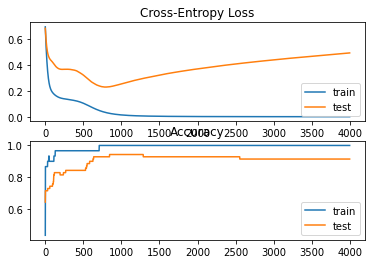

In [2]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0)

_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

The model is trained on the make_moons dataset, which is a 2D classification dataset in which points belong to one of two classes arranged in the shape of two interleaving half circles.

The implementation uses a neural network with two layers - one hidden layer with 500 neurons and a ReLU activation function, and one output layer with one neuron and a sigmoid activation function.

The weight regularization technique used in this implementation is L2 regularization, which adds a penalty to the loss function based on the squared magnitude of the weights. The regularization parameter (lambda) is set to 0.001.

The training process is run for 4000 epochs, and the results are plotted using Matplotlib. Two plots are generated - one showing the cross-entropy loss on the training and test sets, and another showing the accuracy on the training and test sets.

Finally, the accuracy of the model is evaluated on both the training and test sets, and the results are printed to the console.

Train: 1.000, Test: 0.943


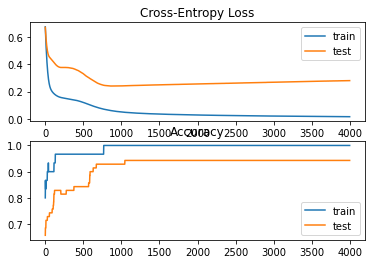

In [3]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from matplotlib import pyplot

X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0)

_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

The model used in this case study consists of a single hidden layer with 500 nodes, ReLU activation function, and L2 weight regularization. The L2 regularization is implemented using the kernel_regularizer parameter in the Dense function, with the value of the regularization parameter (param) ranging from 1e-1 to 1e-6. The output layer consists of a single node with a sigmoid activation function, which makes it suitable for binary classification tasks.

The code trains the model for 4000 epochs using the Adam optimizer and evaluates the performance of the model on both the training and test sets using the binary cross-entropy loss function and the accuracy metric. The performance metrics (train and test accuracy) for each value of the regularization parameter are stored in two lists (all_train and all_test) for later visualization.

Finally, the code uses matplotlib to plot the train and test accuracy versus the regularization parameter (param). The semilogx function is used to plot the x-axis on a logarithmic scale.

This case study aims to demonstrate the effect of L2 weight regularization on the performance of a neural network model. By analyzing the performance metrics of the model for different values of the regularization parameter, one can determine the optimal value that provides the best balance between model complexity and performance.

Param: 0.100000, Train: 0.967, Test: 0.800
Param: 0.010000, Train: 1.000, Test: 0.929
Param: 0.001000, Train: 1.000, Test: 0.943
Param: 0.000100, Train: 1.000, Test: 0.929
Param: 0.000010, Train: 1.000, Test: 0.914
Param: 0.000001, Train: 1.000, Test: 0.914


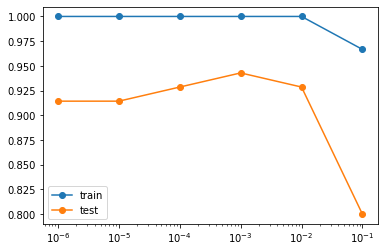

In [4]:
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l2
from matplotlib import pyplot

X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()
for param in values:
	model = Sequential()
	model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(param)))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	model.fit(trainX, trainy, epochs=4000, verbose=0)
	_, train_acc = model.evaluate(trainX, trainy, verbose=0)
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
	all_train.append(train_acc)
	all_test.append(test_acc)

pyplot.semilogx(values, all_train, label='train', marker='o')
pyplot.semilogx(values, all_test, label='test', marker='o')
pyplot.legend()
pyplot.show()


The results show that increasing the regularization parameter reduces overfitting and improves generalization performance. As the regularization parameter decreases, the model becomes increasingly complex, and the model overfits to the training set, resulting in poor performance on the test set. Conversely, as the regularization parameter increases, the model becomes simpler, and the model underfits the training set, resulting in poor performance on the training set.

In this case, the best performance on the test set is achieved with a regularization parameter of 0.001, which achieves a test accuracy of 0.943. This value of the regularization parameter strikes a balance between underfitting and overfitting, resulting in the best generalization performance.